# Gradient Descent
#### sources : 
- https://machinelearnia.com/descente-de-gradient/
- https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a


#### Les droites de régressions linéaires sont des fonctions affines s'écrivant sous la forme : $$ f(x^{(i)})=a.x^{(i)}+b $$ pouvant s'écrire comme le produit matriciel : $$ F = X.\theta $$ avec $X = \begin{vmatrix} x^{(1)} & 1 \\ ... &  ...\\ x^{(m)} & 1 \end{vmatrix}$, &nbsp; $\theta = \begin{vmatrix} a \\ b \end{vmatrix}$ &nbsp; et &nbsp; $F = \begin{vmatrix} f(x^{(1)}) \\ ... \\ f(x^{(m)}) \end{vmatrix}$
#### La fonction coût que l'on va utiliser pour la descent de gradient s'écrit : $$J(a,b) = \frac{1}{2m} \sum_{i=1}^{m} (a.x^{(i)}+b-y^{(i)})^2$$ 

#### Cette fonction coût, c'est littéralement la somme des erreurs au carré (MSE) ou "somme quadratique" des erreurs, c'est à dire de la différence entre le modèle et les données (le modèle est une droite quand on a 1 variable explicative, un plan pour 2 variables, un "hyperplan" quand le nombre de variables est > 3). 

#### Il s'écrit sous forme matricielle : $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (X.\theta-Y)^2$$
#### avec $Y = \begin{vmatrix} y^{(1)} \\ ... \\ y^{(m)} \end{vmatrix}$

#### A présent, en calculant les dérivées partielle de $J$ :
#### $$\left\{\begin{matrix} \frac{\partial J(a,b)}{\partial a} = \frac{1}{m} \sum x(a.x+b-y) \\ \frac{\partial J(a,b)}{\partial b} = \frac{1}{m} \sum 1(a.x+b-y)  \end{matrix}\right.$$

#### $$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}.X^{T}(X.\theta - Y)$$

# 1 - Descente de gradient à 1 variable, régression linéaire simple

## On prend un exemple simple pour commencer

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1.1 - Nuage de points d'une variable à tendance linéaire (générée avec make_regression)

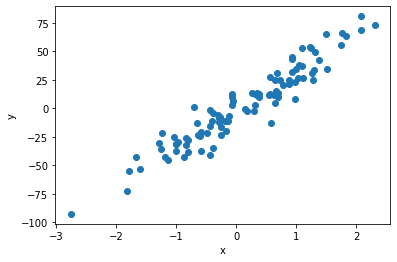

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
print(x.shape)
print(y.shape)
y = y.reshape(y.shape[0],1)
print(y.shape) #on arrange le vecteur y pour avoir les bonnes dimensions

(100, 1)
(100,)
(100, 1)


In [4]:
# matrice X
X = np.hstack((x, np.ones(x.shape))) #stack : on 'colle' les vecteurs
X[:10] #la matrice contient en 1ere colonne les valeurs de x (dimension Nx1), en deuxième colonne le vecter unité (Nx1)
# la matrice est de dimension (Nx2)

array([[ 0.55622373,  1.        ],
       [-1.0010589 ,  1.        ],
       [ 0.69754751,  1.        ],
       [-0.61203611,  1.        ],
       [ 0.73034276,  1.        ],
       [-0.39494761,  1.        ],
       [-0.25909292,  1.        ],
       [-0.1214107 ,  1.        ],
       [-0.48534626,  1.        ],
       [-1.13925287,  1.        ]])

In [5]:
# on créer le vecteur theta qu'on va initialiser avec des paramètres aléatoires
theta = np.random.randn(2,1) # (2,1) sont les dimensions de theta
theta

array([[-0.12687823],
       [ 0.87001016]])

## 1.2 - Modèle : droite affine (droite de régression avant descente de gradient)

In [6]:
def model(X,theta):
    return X.dot(theta)

model(X,theta).shape #10 premieres "prédictions" du modèle en se basant sur une droite affine aux coefficients aléatoire (très mauvaises prédictions donc)

(100, 1)

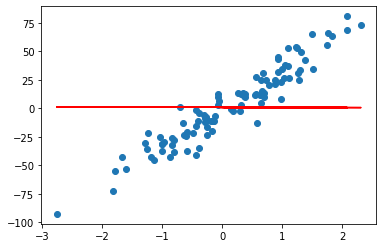

In [7]:
plt.scatter(x, y)
plt.plot(x,model(X,theta), c='r')
plt.show()

### **Commentaire** : là concrètement on a prit des coefficients a,b au pif et on a tracé la droite affine $y=a*x+b$ (droite rouge) par rapport au nuage de points. On a pas encore mis en place l'algorithme de descente de gradient qui va progressivement chercher le couple (a,b) qui minimise les écarts quadratique entre chaque droite générée (par le couple (a,b) et le nuage de points)

## 1.3 - Fonction coût (qui va permettre la descente de gradient)

In [8]:
def cost_function(X, y, theta):
    m = len(y) #nombre de points du dataset
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [9]:
print(cost_function(X,y,theta), '\n....Damn son!')


573.0898101957688 
....Damn son!


### On voit bien que notre droite affine rouge donne un coût très élevé (on veut se rapprocher de 0). Normal, aucun algo d'utilisé pour l'instant. La droite a été générée aléatoirement

## 1.4 - Descente de gradient (enfin!)

#### $\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}.X^{T}(X.\theta - Y)$

In [10]:
# Fonction qui calcul le gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [11]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

## algorithme : $\theta:= \theta - \alpha \frac{\partial J(\theta)}{\partial \theta}$ &rarr; à deux variables : $\left\{\begin{matrix} a:=a-\alpha\frac{\partial J(a,b)}{\partial a} \\ b:=b-\alpha\frac{\partial J(a,b)}{\partial b} \end{matrix}\right.$

In [12]:
# descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    R2_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X,y,theta)
        R2_history[i] = coef_determination(y,model(X,theta))
    return theta, cost_history, R2_history

### On récupère ici 3 données de la descente de gradient 
### (les variables de la droite de régression $\theta$, les valeurs de la fonction coût $J$, les coefficients de déterminations R2): 

In [13]:
theta_final, cost, R2 = gradient_descent(X, y, theta,
                               learning_rate=0.01,
                               n_iterations=1000)

In [14]:
print(theta_final)

[[32.68851269]
 [-1.37651305]]


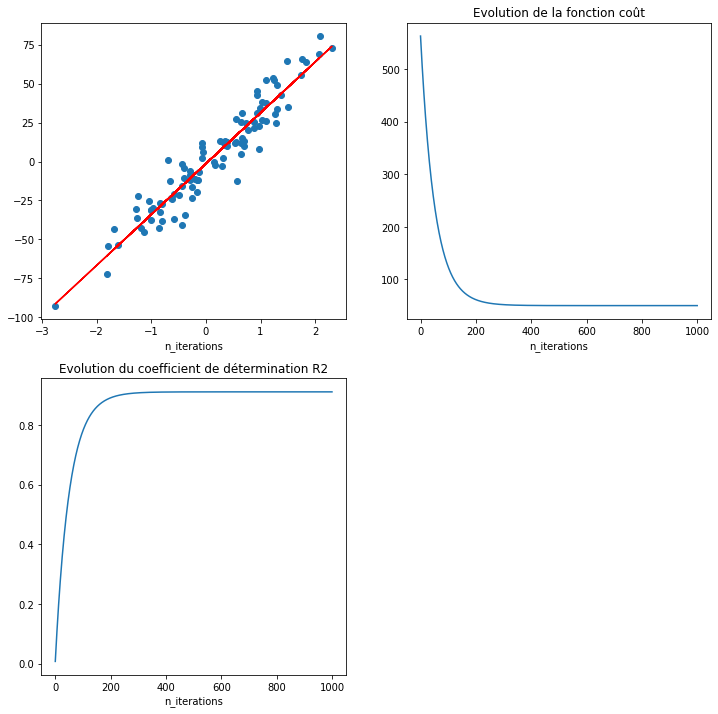

In [15]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.scatter(x,y)
plt.xlabel('n_iterations')
plt.plot(x,X.dot(theta_final),c='r')
plt.subplot(222)
plt.plot(range(1000),cost)
plt.title('Evolution de la fonction coût')
plt.xlabel('n_iterations')
plt.subplot(223)
plt.plot(range(1000),R2)
plt.title('Evolution du coefficient de détermination R2')
plt.xlabel('n_iterations')
plt.show()

In [16]:
prediction = X.dot(theta_final)

In [17]:
coef_determination(y,prediction)

0.9112010256363228

### **Remarque :** ce coef R2 est calculé sur l'ensemble des points d'un jeu de donnée que l'on a crée aléatoirement.Il est "le meilleur possible" au regard des données de base. Si l'on devait prédire des valeurs y à partir d'un échatillon de données x_test, il faudrait recalculer ce R2 (simplement applicuer la fonction coef_determination sur x_test).

# 2 - Descente de gradient à 2 variables, régression linéaire multiple

## 2.1 - Descente de gradient à 2 variables

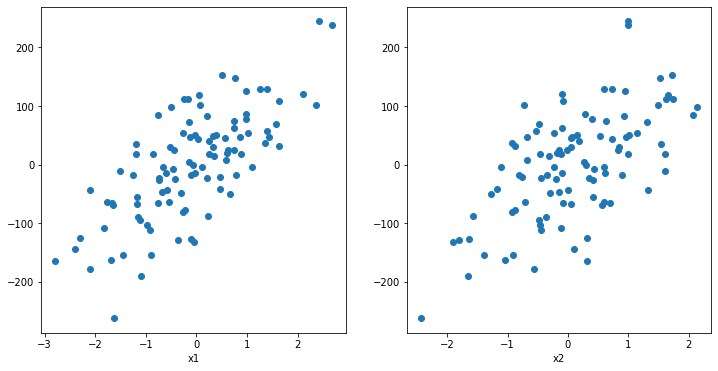

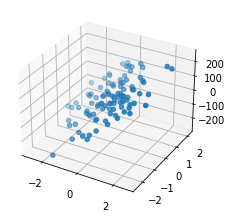

In [18]:
x, y = make_regression(n_samples=100, n_features=2, noise=10)

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(x[:,0],y)
plt.xlabel('x1')
plt.subplot(122)
plt.scatter(x[:,1],y)
plt.xlabel('x2')
plt.show()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(2,2,3,projection='3d')
ax.scatter(x[:,0], x[:,1], y)
plt.show()

#### Avec 3 variables, la fonction coût s'écrit : $$J(a,b,c) = \frac{1}{2m} \sum_{i=1}^{m} (a.x_1^{(i)}+b.x_2^{(i)}+c-y^{(i)})^2$$ 


In [19]:
print(x.shape)
print(y.shape)
# redimensionner y
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 2)
(100,)
(100, 1)


In [20]:
# matrice X
X = np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-2.09679512  1.31975117  1.        ]
 [-0.10042237 -0.34452248  1.        ]
 [ 0.46334568 -0.7696673   1.        ]
 [-1.20260468  1.59922427  1.        ]
 [ 0.57563366 -0.68522787  1.        ]
 [ 0.33507948  0.52738541  1.        ]
 [ 0.05036456  1.66021361  1.        ]
 [ 0.21641411  0.93504297  1.        ]
 [ 1.26373576  0.72838018  1.        ]
 [ 0.74352943 -0.14624127  1.        ]]


### On déroule la même logique

In [21]:
# variables de theta initialisées aléatoirement
theta = np.random.randn(3,1) # (2,1) sont les dimensions de theta
theta

array([[-0.72955497],
       [-1.40898842],
       [-0.41585909]])

In [22]:
theta_final, cost, R2 = gradient_descent(X, y, theta,
                               learning_rate=0.01,
                               n_iterations=1000)

In [23]:
theta_final

array([[64.35895608],
       [65.88392201],
       [-0.20555102]])

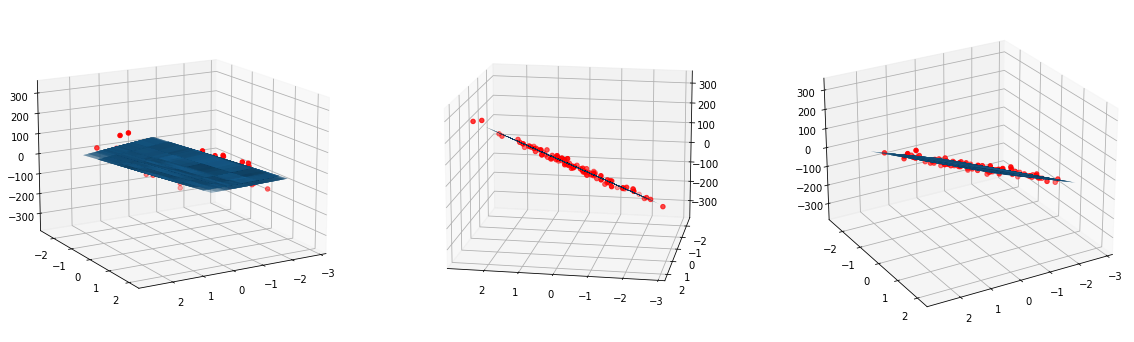

In [24]:
X1,X2 = np.meshgrid(x[:,0],x[:,1])

fig = plt.figure(figsize=(20,8))
# --- first subplot 3D ---
ax1 = fig.add_subplot(131,projection='3d')
surf1 = ax1.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax1.scatter(x[:,0],x[:,1],y, c='r')
ax1.view_init(15,60)
# --- 
ax2 = fig.add_subplot(132,projection='3d')
surf2 = ax2.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax2.scatter(x[:,0],x[:,1],y, c='r')
ax2.view_init(15,100)
# ---
ax3 = fig.add_subplot(133,projection='3d')
surf3 = ax3.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax3.scatter(x[:,0],x[:,1],y, c='r')
ax3.view_init(25,60)

plt.show()


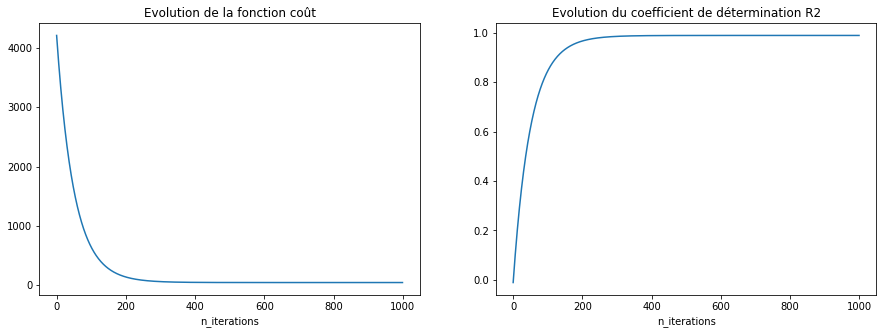

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000),cost)
plt.title('Evolution de la fonction coût')
plt.xlabel('n_iterations')
plt.subplot(122)
plt.plot(range(1000),R2)
plt.title('Evolution du coefficient de détermination R2')
plt.xlabel('n_iterations')
plt.show()

In [26]:
print('R2 à la dernière itération',round(R2[-1],2)) 
print('Valeur de la fonction coût à la dernière itération', round(cost[-1],2))

R2 à la dernière itération 0.99
Valeur de la fonction coût à la dernière itération 46.3


## 2.2 - On applique avec deux variables x1, x2 tout ce même schéma, mais en créant un lot test et train comme avec sklearn

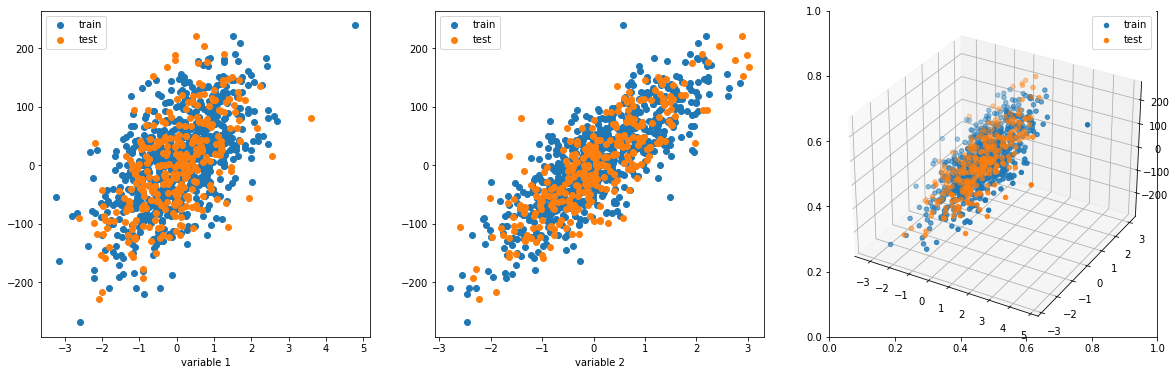

In [27]:
from sklearn.model_selection import train_test_split
x, y = make_regression(n_samples=1000, n_features=2, noise=10)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,6))
ax1.scatter(X_train[:,0],y_train,label='train')
ax1.scatter(X_test[:,0],y_test,label='test')
ax1.set_xlabel('variable 1')
ax1.legend()
ax2.scatter(X_train[:,1],y_train,label='train')
ax2.scatter(X_test[:,1],y_test,label='test')
ax2.set_xlabel('variable 2')
ax2.legend()

ax3 = fig.add_subplot(1,3,3,projection='3d')
ax3.scatter(X_train[:,0], X_train[:,1], y_train,label='train')
ax3.scatter(X_test[:,0], X_test[:,1], y_test,label='test')
ax3.legend()
plt.show()

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# redimensionner y
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print(y_train.shape)
print(y_test.shape)

(700, 2)
(300, 2)
(700,)
(300,)
(700, 1)
(300, 1)


In [29]:
X_train_stacked = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test_stacked = np.hstack((X_test,np.ones((X_test.shape[0],1))))

print(X_train_stacked.shape)
print(X_train_stacked[:10])
print(X_test_stacked.shape)
print(X_test_stacked[:10])

(700, 3)
[[ 0.90451141  2.00806872  1.        ]
 [-1.64550875  1.03042021  1.        ]
 [-1.34893073  0.85806346  1.        ]
 [-1.18651505 -0.55032297  1.        ]
 [-0.57740153 -0.11400713  1.        ]
 [-0.172228    0.61459011  1.        ]
 [-2.02108653 -0.02621419  1.        ]
 [ 0.56228031  2.16082175  1.        ]
 [ 0.14895994 -1.14160607  1.        ]
 [ 1.91089738  0.40138495  1.        ]]
(300, 3)
[[ 1.18936794e+00 -3.05259272e-02  1.00000000e+00]
 [-7.15882985e-01  1.28518601e+00  1.00000000e+00]
 [-9.05244776e-01 -2.33907530e+00  1.00000000e+00]
 [ 9.23317425e-02 -9.70317055e-01  1.00000000e+00]
 [-1.80235608e+00 -8.39310094e-01  1.00000000e+00]
 [ 1.18714376e-02 -7.72894294e-01  1.00000000e+00]
 [ 1.05724989e-01 -5.58182340e-01  1.00000000e+00]
 [-1.16212160e+00 -1.65194193e+00  1.00000000e+00]
 [ 1.54058517e+00  4.87834622e-01  1.00000000e+00]
 [-1.27899190e-03 -1.85986413e-01  1.00000000e+00]]


In [30]:
theta = np.random.randn(3,1) # (2,1) sont les dimensions de theta
theta

array([[ 0.9952203 ],
       [ 0.66798898],
       [-1.31954483]])

In [31]:
theta_final, cost, R2 = gradient_descent(X_train_stacked, y_train, theta,
                               learning_rate=0.01,
                               n_iterations=1000)

In [32]:
theta_final # coefficients qui définissent le plan de régression

array([[ 4.46239923e+01],
       [ 6.49957438e+01],
       [-1.91148243e-02]])

In [33]:
y_pred = model(X_test_stacked,theta_final)

In [34]:
coef_determination(y_test,y_pred)

0.9851470331316707

## 2.3 - Comparaison du résultat de score du lot test en utilisant sklearn directement:

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [36]:
print(f'coefs pentes calculées avec sklearn : {lr.coef_}, ordonnée à l\'origine: {lr.intercept_}')
print(f'coefs pentes calculées avec le gradient descent à la main: {theta_final[0:2]}, ordonnée à l\'origine: {theta_final[2]}')

coefs pentes calculées avec sklearn : [[44.62635411 65.00063288]], ordonnée à l'origine: [-0.02285509]
coefs pentes calculées avec le gradient descent à la main: [[44.62399226]
 [64.99574375]], ordonnée à l'origine: [-0.01911482]


In [37]:
lr.score(X_test,y_test) #

0.9851482681127531

On vient de redémontrer le calcul effectué par sklearn (descente de gradient) en utilisant un exemple simple avec 2 variables explicatives et 1 target

In [38]:
import pandas as pd

df = pd.read_csv('bodyfat.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'bodyfat.csv'

In [ ]:
from statsmodels.api import OLS, add_constant

x = df.drop('BodyFat', axis=1)
y = df['BodyFat']

linreg = LinearRegression().fit(x, y)
ols = OLS(y, add_constant(x)).fit()

coefs = pd.DataFrame({
    "coefficent": pd.Series(linreg.coef_, index = x.columns),
    "p_value":  pd.Series(ols.pvalues, index = ols.pvalues.index[1:])})

coefs\
    .applymap(lambda x: (x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

: 

: 

In [ ]:
print(linreg.intercept_)

450.0125693445755


: 

: 

: 

: 

# 3 - Exemple en prenant un dataset Kaggle
### source: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

## 3.1 - A la mano, descente de gradient pour 2 variables

In [ ]:
import pandas as pd

df = pd.read_csv('bodyfat.csv')

/Users/sqallihadi/.pyenv/versions/simplon/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [ ]:
df.shape

(252, 15)

### 3.1.1 - 2 variables explicatives pour expliquer la target 'BodyFat'

In [ ]:
x = df.loc[:,['Weight','Height']].astype(float)
y = df.loc[:,'BodyFat'].astype(float)

In [ ]:
#x['Age'].astype(float)

: 

: 

In [ ]:
print(x.dtypes,y.dtypes)

Weight    float64
Height    float64
dtype: object float64


### 3.1.2 - Etape de standardisation des données !!
(en m'inspirant de :https://medium.com/@lope.ai/multivariate-linear-regression-from-scratch-in-python-5c4f219be6a)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

### 3.1.3 - On split les données avec un lot test et lot train (façon sklearn)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=7)

In [ ]:
X_train_stacked = np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test_stacked = np.hstack((X_test,np.ones((X_test.shape[0],1))))

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
print(X_train_stacked.shape, y_train.shape)
y_train = y_train.reshape(y_train.shape[0],1)
print(y_train.shape)

(176, 3) (176,)
(176, 1)


In [ ]:
theta = np.random.randn(X_train_stacked.shape[1],1) # les 3 variables + l'ordonnées à l'origine
theta

array([[-0.23326778],
       [-0.33799115],
       [ 0.73354475]])

In [ ]:
cost_l, R2_l  = [],[]
N_iter = 10000
eta = 0.001 
theta_final, cost, R2 = gradient_descent(X_train_stacked, y_train, theta,
                            learning_rate=eta,
                            n_iterations=N_iter)


In [ ]:
print(f'R2 à la dernière itération : {R2[-1]}') 
print(f'Valeur de la fonction coût à la dernière itération :{cost[-1]}')

R2 à la dernière itération : 0.5167466276720373
Valeur de la fonction coût à la dernière itération :18.438463075188142


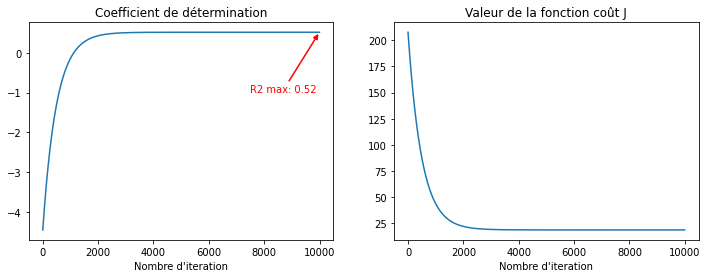

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(range(N_iter),R2)
plt.annotate(f'R2 max: {round(R2[-1],2)}',xy=(N_iter,round(R2[-1],2)),xytext=(N_iter*0.75,-1),c='r',arrowprops=dict(arrowstyle= '-|>',color='red',lw=1.5,ls='-'))
plt.title('Coefficient de détermination')
plt.xlabel('Nombre d\'iteration')
plt.subplot(122)
plt.plot(range(N_iter),cost)
plt.title('Valeur de la fonction coût J')
plt.xlabel('Nombre d\'iteration')
plt.show()

In [ ]:
theta_final

array([[ 6.07686862],
       [-2.12804865],
       [18.9652384 ]])

In [ ]:
ypred = model(X_test_stacked,theta_final)

In [ ]:
print(y_test.shape)
y_test = y_test.reshape(y_test.shape[0],1)
print(y_test.shape)

(76,)
(76, 1)


In [ ]:
print(coef_determination(y_test, ypred))

0.26034947164372113


### 3.1.4 - Représentation graphique des deux variables avec le plan de régression calculé par descente de gradient

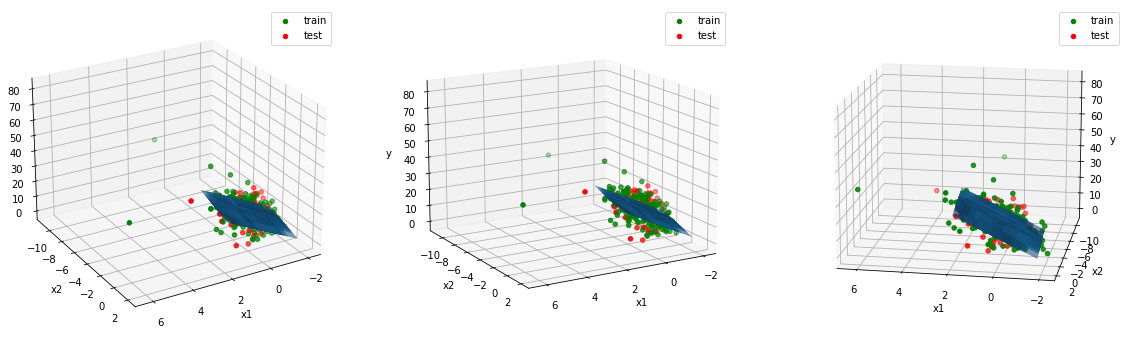

In [ ]:
X1,X2 = np.meshgrid(X_train_stacked[:,0],X_train_stacked[:,1])

fig = plt.figure(figsize=(20,8))
# --- first subplot 3D ---
ax1 = fig.add_subplot(131,projection='3d')
surf1 = ax1.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax1.scatter(X_train_stacked[:,0],X_train_stacked[:,1],y_train, c='g', label='train')
ax1.scatter(X_test_stacked[:,0],X_test_stacked[:,1],y_test, c='r',label='test')
ax1.set(xlabel="x1",ylabel='x2',zlabel='y')
ax1.legend()
ax1.view_init(25,60)
# --- 
ax2 = fig.add_subplot(132,projection='3d')
surf2 = ax2.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax2.scatter(X_train_stacked[:,0],X_train_stacked[:,1],y_train, c='g', label='train')
ax2.scatter(X_test_stacked[:,0],X_test_stacked[:,1],y_test, c='r',label='test')
ax2.set(xlabel="x1",ylabel='x2',zlabel='y')
ax2.legend()
ax2.view_init(15,60)
# ---
ax3 = fig.add_subplot(133,projection='3d')
surf3 = ax3.plot_surface(X1, X2, 
                theta_final[0]*X1+theta_final[1]*X2+theta_final[2],
                alpha=0.2)
ax3.scatter(X_train_stacked[:,0],X_train_stacked[:,1],y_train, c='g', label='train')
ax3.scatter(X_test_stacked[:,0],X_test_stacked[:,1],y_test, c='r',label='test')
ax3.legend()
ax3.set(xlabel="x1",ylabel='x2',zlabel='y')
ax3.view_init(15,100)

plt.show()


In [ ]:
y_train.flatten().shape

(176,)

In [ ]:
import plotly.express as px

X1,X2 = np.meshgrid(X_train_stacked[:,0],X_train_stacked[:,1])
Z = theta_final[0]*X1+theta_final[1]*X2+theta_final[2]

fig = px.scatter_3d(x=X_train_stacked[:,0], y=X_train_stacked[:,1],z=y_train.flatten(), labels='Training set')
fig.add_scatter3d(x=X_test_stacked[:,0], y=X_test_stacked[:,1],z=y_test.flatten(), name='Testing set')
fig.add_surface(x=X1, y=X2, z=Z)
fig.update_layout(title='Plan de régression et variables explicatives (Test/Train)', autosize=True, showlegend=True)
fig.show()

In [ ]:
import plotly.graph_objects as go

# Read data from a csv
X1,X2 = np.meshgrid(X_train_stacked[:,0],X_train_stacked[:,1])
Z = theta_final[0]*X1+theta_final[1]*X2+theta_final[2]

fig = go.Figure(data=[go.Surface(z=Z, x=X1, y=X2)])
fig.add_scatter3d(x=X_train_stacked[:,0],
                  y=X_train_stacked[:,1],
                  z=y_train.flatten(), mode='markers', marker=dict(size=3, colorscale='viridis'), name='Training set')
fig.add_scatter3d(x=X_test_stacked[:,0],
                  y=X_test_stacked[:,1],
                  z=y_test.flatten(), mode='markers', marker=dict(size=3), name='Testing set')
fig.update_layout(title='Test', autosize=True, showlegend=True)
fig.show()

## 3.2 - En comparaison avec le LinearRegression de sklearn ?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.score(X_train,y_train)

0.5167466375907517

In [ ]:
lr.score(X_test,y_test)

0.2603693439383481

In [ ]:
print(f'pentes du modèles : {lr.coef_}\nordonnée à l\'origine du modèle:{lr.intercept_} ')
print(f'coefs calculés avec descente de gradient:\n{theta_final}')

pentes du modèles : [[ 6.07725584 -2.12834888]]
ordonnée à l'origine du modèle:[18.965964] 
coefs calculés avec descente de gradient:
[[ 6.07686862]
 [-2.12804865]
 [18.9652384 ]]


### --> On trouve bien les mêmes résultats ! Hurray

In [ ]:
cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

array([0.1737234 , 0.65987628, 0.47599039, 0.249587  , 0.55082322])

### Maintenant plus qu'à faire la même chose avec 3 variables et + (mais on ne pourra pas faire de jolies visualisations)